# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime as dt 
# Import API key
#from api_keys import api_key
api_key = "187a3a18ad2318a1a72d5a39b266908f"
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#cities_pd = pd.DataFrame(cities)
#print(cities_pd)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#units="Imperial"
#url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key"
#query_url = f"{url}&appid={api_key}&units={units}&q={city}"
url = "http://api.openweathermap.org/data/2.5/weather?appid=" + api_key


city_data = []


print("Beginning Data Retrieval")
print("--------------------------------")

#counting the record and set
record_count = 1
set_count = 1

#looping through the cities in our list
for i, city in enumerate(cities):
    
#grouping cities in set of 50
    if (i % 50 == 0 and i >= 50):
            set_count += 1     
            record_count = 0
            
#creating endpoint url with each city
    city_url = url + "&q=" + city
    #print( city_url)
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
        
#adding 1 to record count
    record_count += 1 

#run api request for each city
    try:
        city_weather = requests.get(city_url).json()
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_cloud = city_weather["clouds"]["all"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        city_humidity = city_weather["main"]["humidity"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_wind = city_weather["wind"]["speed"]
        
        city_data.append({"City":city,
                          "Cloudiness":city_cloud,
                          "Country":city_country,
                          "Date":city_date,
                          "Humidity":city_humidity,
                          "Lat":city_lat,
                          "Lng":city_lng,
                          "Max Temp":city_max_temp,
                          "Wind Speed":city_wind})
    except:
        print("City not found. Skipping......")
        pass
        #print(city_data)

Beginning Data Retrieval
--------------------------------
Processing Record 1 of Set 1 | taolanaro
City not found. Skipping......
Processing Record 2 of Set 1 | tual
Processing Record 3 of Set 1 | butaritari
Processing Record 4 of Set 1 | new norfolk
Processing Record 5 of Set 1 | leningradskiy
Processing Record 6 of Set 1 | dikson
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | huilong
Processing Record 9 of Set 1 | beringovskiy
Processing Record 10 of Set 1 | abinsk
Processing Record 11 of Set 1 | avera
Processing Record 12 of Set 1 | poya
Processing Record 13 of Set 1 | hurricane
Processing Record 14 of Set 1 | chuy
Processing Record 15 of Set 1 | tiksi
Processing Record 16 of Set 1 | asau
City not found. Skipping......
Processing Record 17 of Set 1 | ancud
Processing Record 18 of Set 1 | clonakilty
Processing Record 19 of Set 1 | atuona
Processing Record 20 of Set 1 | nikolskoye
Processing Record 21 of Set 1 | sabha
Processing Record 22 of Set 1 | ushuaia
Proc

Processing Record 33 of Set 4 | san quintin
Processing Record 34 of Set 4 | torbay
Processing Record 35 of Set 4 | galle
Processing Record 36 of Set 4 | boca do acre
Processing Record 37 of Set 4 | nemuro
Processing Record 38 of Set 4 | severo-kurilsk
Processing Record 39 of Set 4 | nedjo
Processing Record 40 of Set 4 | berlevag
Processing Record 41 of Set 4 | port elizabeth
Processing Record 42 of Set 4 | lulea
Processing Record 43 of Set 4 | valparaiso
Processing Record 44 of Set 4 | halifax
Processing Record 45 of Set 4 | ceyhan
Processing Record 46 of Set 4 | manoel urbano
Processing Record 47 of Set 4 | laguna
Processing Record 48 of Set 4 | rawson
Processing Record 49 of Set 4 | haines junction
Processing Record 0 of Set 5 | kanalion
Processing Record 1 of Set 5 | luanda
Processing Record 2 of Set 5 | sur
Processing Record 3 of Set 5 | katsuura
Processing Record 4 of Set 5 | tasiilaq
Processing Record 5 of Set 5 | warri
Processing Record 6 of Set 5 | kodiak
Processing Record 7 of

Processing Record 23 of Set 8 | tall kayf
Processing Record 24 of Set 8 | fairbanks
Processing Record 25 of Set 8 | miracatu
Processing Record 26 of Set 8 | karratha
Processing Record 27 of Set 8 | kindu
Processing Record 28 of Set 8 | ulaanbaatar
Processing Record 29 of Set 8 | karauzyak
City not found. Skipping......
Processing Record 30 of Set 8 | waitati
Processing Record 31 of Set 8 | coahuayana
Processing Record 32 of Set 8 | olathe
Processing Record 33 of Set 8 | kavaratti
Processing Record 34 of Set 8 | revda
Processing Record 35 of Set 8 | penzance
Processing Record 36 of Set 8 | yarkovo
Processing Record 37 of Set 8 | saint-philippe
Processing Record 38 of Set 8 | nuuk
Processing Record 39 of Set 8 | veraval
Processing Record 40 of Set 8 | ryotsu
Processing Record 41 of Set 8 | kegayli
City not found. Skipping......
Processing Record 42 of Set 8 | neropolis
Processing Record 43 of Set 8 | bozoum
Processing Record 44 of Set 8 | zuwarah
Processing Record 45 of Set 8 | nishihara

Processing Record 6 of Set 12 | cortez
Processing Record 7 of Set 12 | buta
Processing Record 8 of Set 12 | general salgado
Processing Record 9 of Set 12 | abalak
Processing Record 10 of Set 12 | inhambane
Processing Record 11 of Set 12 | mujiayingzi
Processing Record 12 of Set 12 | abancay
Processing Record 13 of Set 12 | dunedin
Processing Record 14 of Set 12 | khingansk
Processing Record 15 of Set 12 | waipawa
Processing Record 16 of Set 12 | bandarbeyla
Processing Record 17 of Set 12 | bac lieu
City not found. Skipping......
Processing Record 18 of Set 12 | luderitz
Processing Record 19 of Set 12 | babaeski
Processing Record 20 of Set 12 | vodnany
Processing Record 21 of Set 12 | najran
Processing Record 22 of Set 12 | bolshoye nagatkino
Processing Record 23 of Set 12 | hovd
Processing Record 24 of Set 12 | tamandare
Processing Record 25 of Set 12 | ayagoz
Processing Record 26 of Set 12 | cravo norte
Processing Record 27 of Set 12 | domoni
City not found. Skipping......
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#converting array of json into panda df
city_data_pd = pd.DataFrame(city_data)

#extracting relevant field from df
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humudity =  city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed= city_data_pd["Wind Speed"]

city_data_pd.count()

City          540
Cloudiness    540
Country       540
Date          540
Humidity      540
Lat           540
Lng           540
Max Temp      540
Wind Speed    540
dtype: int64

In [12]:
(city_data_pd).head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,tual,98,ID,1564263341,85,-5.67,132.75,297.702,8.83
1,butaritari,67,KI,1564263341,73,3.07,172.79,302.302,4.45
2,new norfolk,20,AU,1564263341,80,-42.78,147.06,279.820,3.10
3,leningradskiy,32,RU,1564263341,85,69.38,178.42,279.402,3.67
4,dikson,100,RU,1564263342,97,73.51,80.55,274.602,3.83


In [13]:
# export to csv
#city_data_pd.to_csv(output_data_file,index_label="City_ID")
city_data_pd.to_csv("plot1.png")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

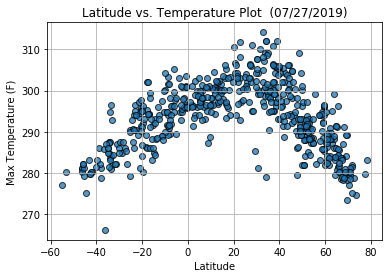

In [23]:
plt.scatter(lats,
            max_temps,
            marker="o",
            alpha=0.75,
            edgecolor="black",
            linewidths=1,
           label="Cities")
today = dt.datetime.today().strftime("%m/%d/%Y")
plt.title("Latitude vs. Temperature Plot  ("+ today + ")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)   
            
#save the figure                        
plt.savefig("outputfile.png")

#show plot            
plt.show()

#### Latitude vs. Humidity Plot

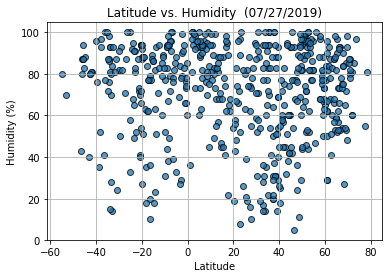

In [27]:
plt.scatter(lats,
            humudity,
            marker="o",
            alpha=0.75,
            edgecolor="black",
            linewidths=1,
           label="Cities")

today = dt.datetime.today().strftime("%m/%d/%Y")
plt.title("Latitude vs. Humidity  ("+ today + ")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)   
            
#save the figure                        
plt.savefig("outputfile.png")
            
#show plot            
plt.show()

#### Latitude vs. Cloudiness Plot

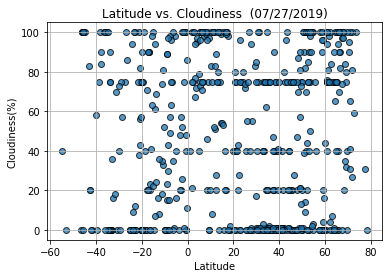

In [28]:
plt.scatter(lats,
            cloudiness,
            marker="o",
            alpha=0.75,
            edgecolor="black",
            linewidths=1,
           label="Cities")
today = dt.datetime.today().strftime("%m/%d/%Y")
plt.title("Latitude vs. Cloudiness  ("+ today + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid(True)   
            
#save the figure                        
plt.savefig("outputfile.png")
            
#show plot            
plt.show()

#### Latitude vs. Wind Speed Plot

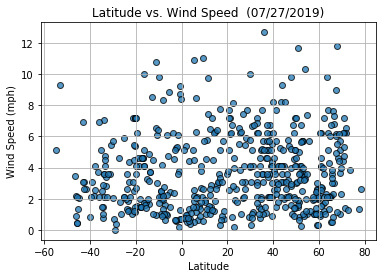

In [29]:
plt.scatter(lats,
            wind_speed,
            marker="o",
            alpha=0.75,
            edgecolor="black",
            linewidths=1,
           label="Cities")
today = dt.datetime.today().strftime("%m/%d/%Y")
plt.title("Latitude vs. Wind Speed  ("+ today + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)   
            
#save the figure                        
plt.savefig("outputfile.png")
            
#show plot            
plt.show()
